We are going to solve nonlinear ODE with boundary values of this below:
$$\frac 1 2 v'' + |v'| - v + 1 = 0, \ \hbox{ on } (-1, 1); \quad \ v(\pm 1) = 0.$$ 
From its __probabilistic view__, one can guess that, (1) $v$ is even; (2)$v'\ge 0$ on $(0,1)$. This suggests to solve the following linear ODE instead:
$$\frac 1 2 u'' + u' - u + 1 = 0, \ \hbox{ on } (0, 1); \quad \ u(1) = u'(0+) = 0.$$
If we are lucky enough to find the solution $u$, then we can set the candidate solution $v(x) = u(|x|)$, and verify the original PDE. Some possible extensions are listed at the end.

__Solution__

$v(x) = u(|x|)$, where $u$ is given by
$$u(x) = a_1 +1 + \frac{e^{-\lambda_1 x} - e^{-\lambda_2 x}}{e^{-\lambda_1} - e^{-\lambda_2}},$$
with parameters given by
$$\lambda_1 = 1 + \sqrt 3, \  \lambda_2 = 1 - \sqrt 3, \  a_1 = \frac{-2\sqrt 3}{\lambda_1 e^{-\lambda_2} - \lambda_2 e^{-\lambda_1}}.$$

In [95]:
x, a = var('x', 'a')
u = function('u')(x)
de = 1/2*diff(u,x,2) + diff(u, x) - u + 1 == 0
print(de)

-u(x) + diff(u(x), x) + 1/2*diff(u(x), x, x) + 1 == 0


Sage does not solve ODE with mixed boundary, but it is good at solving Dirichlet problem. So we first solve the following equation parameterized by $a$:
$$\frac 1 2 u'' + u' - u + 1 = 0, \ \hbox{ on } (0, 1); \quad \ u(1) = 0, \ u(0) = a.$$

In [99]:
u = desolve(de, dvar = u, ivar = x, ics = [0, a, 1, 0]);
u 

(a*e^(sqrt(3) - 1) - e^(sqrt(3) - 1) + 1)*e^(-x*(sqrt(3) + 1))/(e^(sqrt(3) - 1) - e^(-sqrt(3) - 1)) - (a*e^(-sqrt(3) - 1) - e^(-sqrt(3) - 1) + 1)*e^(x*(sqrt(3) - 1))/(e^(sqrt(3) - 1) - e^(-sqrt(3) - 1)) + 1

In [108]:
show(u)

Now, we want to solve for $a$ from $u'(0+) = 0$

In [102]:
up = diff(u,x) #derivative of $u$
print(up)
up0 = up(x=0) #derivative of $u(0)$ parameterized by $a$
print(up0)
aSol = up0.solve(a) #solve for $a$
print(aSol)

-(a*e^(sqrt(3) - 1) - e^(sqrt(3) - 1) + 1)*(sqrt(3) + 1)*e^(-x*(sqrt(3) + 1))/(e^(sqrt(3) - 1) - e^(-sqrt(3) - 1)) - (a*e^(-sqrt(3) - 1) - e^(-sqrt(3) - 1) + 1)*(sqrt(3) - 1)*e^(x*(sqrt(3) - 1))/(e^(sqrt(3) - 1) - e^(-sqrt(3) - 1))
-(a*e^(sqrt(3) - 1) - e^(sqrt(3) - 1) + 1)*(sqrt(3) + 1)/(e^(sqrt(3) - 1) - e^(-sqrt(3) - 1)) - (a*e^(-sqrt(3) - 1) - e^(-sqrt(3) - 1) + 1)*(sqrt(3) - 1)/(e^(sqrt(3) - 1) - e^(-sqrt(3) - 1))
[
a == ((sqrt(3) + 1)*e^(sqrt(3) - 1) + (sqrt(3) - 1)*e^(-sqrt(3) - 1) - 2*sqrt(3))/((sqrt(3) + 1)*e^(sqrt(3) - 1) + (sqrt(3) - 1)*e^(-sqrt(3) - 1))
]


In [107]:
show(aSol[0])

Find $u$ on entire interval $(-1,1)$ by its symmetry. Then one can check manually $u$ is a classical solution of the original nonlinear equation.

In [74]:
uu = u.subs(aSol[0])
v(x) = uu(abs(x))
v(0).n() #print out the numerical value of the maximum of $v$

0.395287507597976

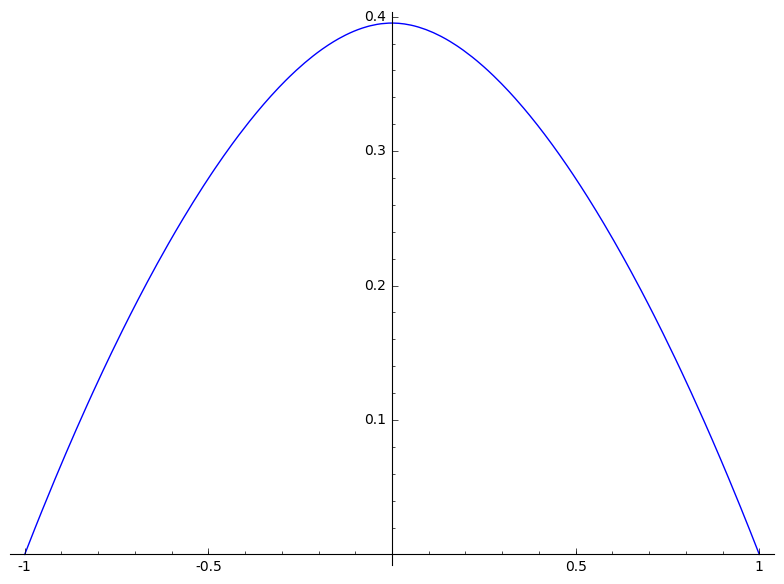

In [68]:
plot(v)

__Possible extensions:__

- Multidimensional case
- Probability representation of $v$ and $u$;
- BSDE representation;
- Replace $1$ in the equation by nonnegative $\ell$;
- Replace $1$ by $-1$, further by $f(x)$ with oscillating up and down from zero;
- Change $u''$ by $-(-\Delta)^{\alpha/2}$